# Análise exploratória de um dataset sobre notas escolares.
O dataset utilizado como base de dados pode ser encontrado em: https://www.kaggle.com/spscientist/students-performance-in-exams

Nesse notebook vamos analisar o dataset em questão e fazer algumas exibições de dados como:


● Distribuição de notas por gênero e a influência de cursos de preparação nas notas;

● Relação entre a escolaridade dos pais e as notas dos alunos;

● Relação entre a nota de leitura e a nota de escrita;

● Nota média para as 3 disciplinas por gênero;

● Entre outros;


O intuito desse notebook é apenas extrair, exibir e, se possível, correlacionar os dados a fim de inferir possíveis padrões e conclusões. O objetivo final é exercitar a utilização da linguagem python para extrair informações de bases de dados utilizando tabelas e gráficos.

Para mais informações sobre os dados do dataset, visite o link acima.

*Todas as traduções nesse arquivo são livres, ou seja, podem estar ligeiramente diferente da tradução que você fizer.

# Importando as bibliotecas e os dados
Primeiro começamos com os imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')
%matplotlib inline

Com as bibliotecas importadas, vamos dar uma olhada nos dados:

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
True in df.isnull()

False

In [23]:
True in df.isna()

False

In [4]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [5]:
df_i = df.drop(labels = ['math score','reading score','writing score'], axis = 1)

In [6]:
for coluna in df_i.columns:
    print(f'\nOs valores únicos da coluna {coluna} são:', df_i[coluna].unique())


Os valores únicos da coluna gender são: ['female' 'male']

Os valores únicos da coluna race/ethnicity são: ['group B' 'group C' 'group A' 'group D' 'group E']

Os valores únicos da coluna parental level of education são: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Os valores únicos da coluna lunch são: ['standard' 'free/reduced']

Os valores únicos da coluna test preparation course são: ['none' 'completed']


Agora que sabemos os possíveis dados em cada coluna, excluindo as colunas de notas, e que não existem valores nulos no dataset, podemos começar ajusta o dataset para visualizar de fato as informações e relações entre esses dados.

Note que na coluna 'test preparation course' temos como entrada 'none' em algumas linhas. Podemos partir do ponto de vista que esses dados deveriam ser dados missing. Mas como não existe nenhuma especificação de qual tipo de curso os alunos fizeram, nem nessa mesma coluna nem em outra, logo, podemos considerar 'none' como uma entrada válida que siginifica que esse aluno não fez nenhum curso preparatório.

Uma possível forma de classificar os alunos por meio de suas notas seria calcular a média simples ou ponderada de cada um. Vamos considerar que cada nota tem um mesmo peso para aprovação, portanto, caso a média do(a) aluno(a) seja maior que 60 pontos, ele(a) será aprovado(a). Caso contrário, será reprovado(a).

Sendo assim, vamos adicionar duas colunas ao dataset: mean e approvation.

In [7]:
mean = [round(((df['math score'][line]+df['reading score'][line]+df['writing score'][line])/3),2) for line in df.index]
df['mean'] = mean

In [8]:
approvation = ['Yes' if score>=60 else 'No' for score in df['mean']]
df['approvation'] = approvation

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,approvation
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,No
4,male,group C,some college,standard,none,76,78,75,76.33,Yes


# Visualizando as informações
Vamos começar verificando a distribuição por gênero:

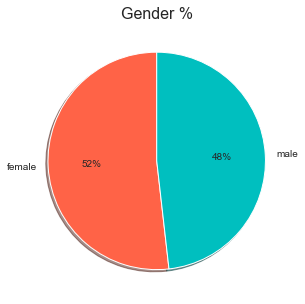

In [10]:
plt.figure(figsize=(10,5))
plt.pie(df['gender'].value_counts(), labels = df['gender'].unique(), autopct = "%.f%%", shadow = True, startangle=90,
       colors = ['tomato', 'c'])
plt.title('Gender %', fontsize=16)
plt.show()

São mais mulhers (51.8%) do que homens (48.2%). Vamos verificar a distribuição das notas de cada matéria e da média, e vamos ver também a porcentagem de alunos aprovados:

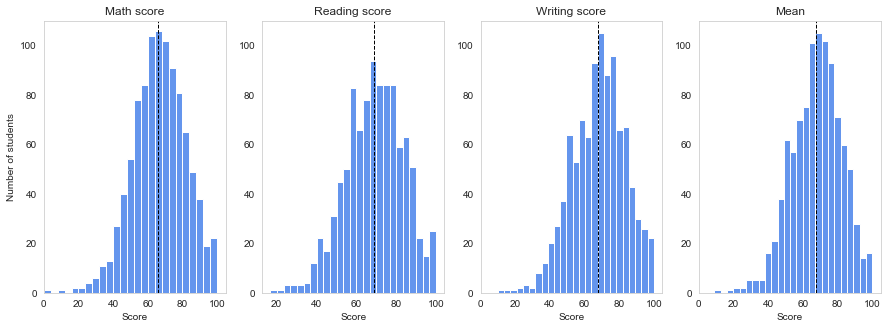

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.hist(x = 'math score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['math score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Math score')
plt.xlabel('Score')
plt.ylabel('Number of students')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

plt.subplot(1,4,2)
plt.hist(x = 'reading score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['reading score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Reading score')
plt.xlabel('Score')
plt.ylim((0,110))
plt.xlim()
plt.grid()

plt.subplot(1,4,3)
plt.hist(x = 'writing score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['writing score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Writing score')
plt.xlabel('Score')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

plt.subplot(1,4,4)
plt.hist(x = 'mean', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['mean'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Mean')
plt.xlabel('Score')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

In [12]:
means = pd.Series({'Math':round(df['math score'].mean(),2),
                   'Reading':round(df['reading score'].mean(),2),
                   'Writing':round(df['writing score'].mean(),2),
                   'Mean':round(df['mean'].mean(),2)})
print('As médias de cada matéria, mostradas nos histogramas acima como linha preta pontilhada, são:\n',means, sep='')

As médias de cada matéria, mostradas nos histogramas acima como linha preta pontilhada, são:
Math       66.09
Reading    69.17
Writing    68.05
Mean       67.77
dtype: float64


In [13]:
approved, appr_male, disap_male, appr_female, disap_female = 0,0,0,0,0
for data in df['approvation']:
    if data == 'Yes':
        approved += 1
        
disapproved = df['approvation'].count() - approved
total = approved + disapproved

for i in df['approvation'].index:
    if df['approvation'][i] == 'Yes' and df['gender'][i] == 'male':
        appr_male += 1
    elif df['approvation'][i] == 'No' and df['gender'][i] == 'male':
        disap_male += 1
    elif df['approvation'][i] == 'Yes' and df['gender'][i] == 'female':
        appr_female += 1
    else:
        disap_female += 1

#total approved/disapproved
print(f"Dos {total} alunos, {approved} foram aprovados e {disapproved} foram reprovados.")

#total approved/disapproved percentage
print(f"Ou {round((approved/total*100),1)}% aprovados e {round((disapproved/total*100), 1)}% reprovados.\n")

#approved by gender
print(f"Do total de alunos, {appr_male} são homens ({round(appr_male/total*100,1)}%) e \
{appr_female} são mulheres ({round(appr_female/total*100,1)}%).")

#disapproved by gender
print(f"E dos reprovados, {disap_male} são homens ({round(disap_male/total*100,1)}%) e \
{disap_female} são mulheres ({round(disap_female/total*100,1)}%).\n")

Dos 1000 alunos, 715 foram aprovados e 285 foram reprovados.
Ou 71.5% aprovados e 28.5% reprovados.

Do total de alunos, 321 são homens (32.1%) e 394 são mulheres (39.4%).
E dos reprovados, 161 são homens (16.1%) e 124 são mulheres (12.4%).



Graficamente:

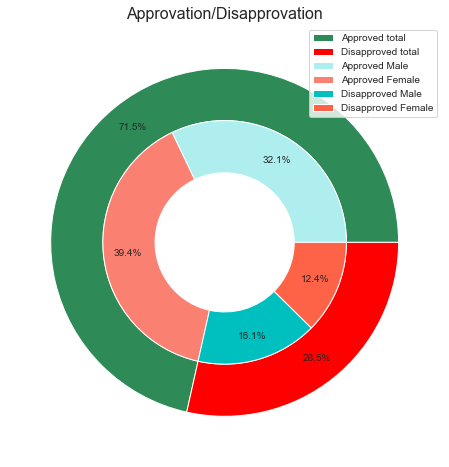

In [14]:
plt.figure(figsize=(12,8))
plt.pie(x = [approved,disapproved], autopct = '%.1f%%', pctdistance=.85,
        radius = 1, colors = ['seagreen','r'],wedgeprops=dict(width=.3))
plt.pie(x = [appr_male,appr_female,disap_male,disap_female], autopct = '%.1f%%', pctdistance=.8,
        colors = ['paleturquoise','salmon','c','tomato'] ,radius = .7, wedgeprops=dict(width=.3))
plt.legend(('Approved total','Disapproved total','Approved Male','Approved Female', 'Disapproved Male','Disapproved Female'))
plt.title('Approvation/Disapprovation', fontsize=16)
plt.show()

Com os histogramas apresentados podemos constatar que apenas em matemática algum(s) aluno(s) teve uma nota bem próxima de zero. Como as médias das matérias individuais são todas maiores que 60, já podemos inferir que a média dos alunos seriam aprovados. O dado mais preciso, como mostrado acima, é que 71.5% dos alunos foram aprovados e desses, a maior parte são mulheres.
Outro ponto interessante é que a distribuição das notas de leitura é diferente da distribuição das notas de escrita. Mesmo assim as médias são parecidas. Isso significa, nessa análise para esse dataset, que na média, leitura e escrita são complementares. A nota de leitura contribui para a nota de escrita, e vice-versa. Faz sentido, já que estudos comprovam que quem lê bastante tende a ter uma escrita melhor do que quem lê pouco.

Agora veremos qual a influência da escolaridade dos pais dos alunos em relação às suas notas.

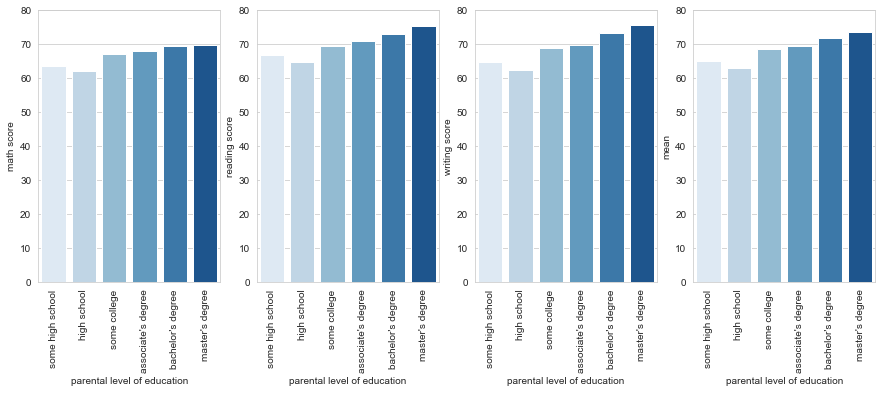

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'math score', palette = 'Blues', 
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                     "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,2)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'reading score', palette = 'Blues',
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,3)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'writing score', palette = 'Blues', 
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,4)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'mean', palette = 'Blues',
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)
plt.show()

Os níveis de escolaridade apresentados podem ser interpretados como:
-Some high school: Ensino médio incompleto;
-High school: Ensino médio completo;
-Some college: Até o segundo ano de faculdade;
-Associate's degree: Até o segundo ano de faculdade ou curso técnico/tecnólogo completo;
-Bachelor's degree: Ensino superior completo;
-Master's degree: Mestrado completo.

Podemos ver claramente que quanto maior o nível de escolaridade dos pais, com exceção ao nível high school (ensino médio completo), maiores as notas individuais, portanto, maiores as médias.
Não é possível afirmar o porquê dessa redução na nota no nível high school. Pode ser por uma maior dificuldade de aprendizado desses alunos, falta de acompanhamento dos pais nos estudos dos filhos (tanto por desinteresse quanto por falta de tempo por causa do trabalho e/ou outras atividades do cotidiano), entre outros motivos. Para concluirmos algo, seria necessário mais informações.

Agora veremos a influência de cursos preparatórios nas notas finais dos alunos.

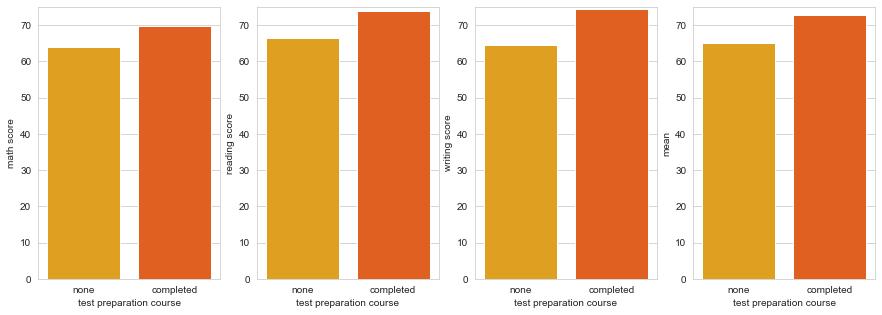

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'math score', errwidth = 0, palette = 'autumn_r',data = df)

plt.subplot(1,4,2)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'reading score', errwidth = 0, palette = 'autumn_r',data = df)

plt.subplot(1,4,3)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'writing score', errwidth = 0, palette = 'autumn_r', data = df)

plt.subplot(1,4,4)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'mean', errwidth = 0, palette = 'autumn_r',data = df)

plt.show()

Para esse estudo, os cursos de preparação se converteram em notas maiores. Vale ressaltar que não é especificado qual o tipo de curso (reforço ou aula particular), duração ou frequência (1h todos os dias, 4h três dias na semana, etc.). Portanto não podemos afirmar nem que o aumento da nota foi satisfatório e nem que foi abaixo do esperado.

Vejamos se algum grupo étnico possui notas maiores:

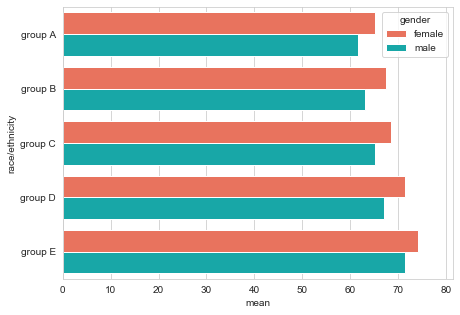

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'mean', y = 'race/ethnicity', hue = 'gender', data = df, errwidth=0,
           order = ['group A','group B','group C','group D','group E'], orient= "h",
           palette = ['tomato', 'c'])

Novamente, as meninas tem média maior que os meninos. Isso vale para todos os grupos étnicos. Podemos ver ainda que do grupo A ao E as médias vão aumentando. Não podemos atribuir esse aumento de média por grupo a uma condição específica já que não temos mais dados sobre os alunos.

Uma informação que podemos extrair do dataset é a possível classe econômica dos alunos. Vamos verificar o tipo de almoço na coluna lunch do dataset que só possui 2 entradas: standard (padrão) e free/reduced (reduzido) e se esse aluno completou algum curso de preparação. Se o(a) aluno(a) tem alimentação normal e concluiu um curso de preparação, ele(a) fará parte da classe econômica mais alta, e se sua alimentação é reduzida e ele não concluiu nenhum curso, fará parte da classe econômica mais baixa. Vamos supor também que o curso de preparação seja pago. Assim, considerando um aluno que não tem alimentação adequada, podemos inferir que ele tem maiores chances de ter uma nota mais baixa, tanto pela questão alimentar quanto por não poder fazer um curso de preparação por falta de dinheiro.

Para isso vamos criar uma nova coluna chamada 'Economical class' que terá como entrada 'high' para almoço normal e curso concluído, 'medium' para almoço normal/curso não concluído e 'low' para almoço reduzido e curso não concluído. Caso tenhamos um aluno com almoço reduzido e curso concluído a entrada será 'scholarship', pois como estamos premissando que o curso seja pago, um aluno que tem dificuldades em ter uma alimentação adequada provavelmente não tem condições de pagar um curso de preparação. Mas isso não o impede de ter uma bolsa de estudos.

In [18]:
economical_class = []
for i in df.index:
    if df['lunch'][i] == 'standard' and df['test preparation course'][i] == 'completed':
        economical_class.append('High')
    elif df['lunch'][i] == 'free/reduced' and df['test preparation course'][i] == 'none':
        economical_class.append('Low')
    elif df['lunch'][i] == 'free/reduced' and df['test preparation course'][i] == 'completed':
        economical_class.append('Scholarship')
    else:
        economical_class.append('Medium')
        
df['Economical class'] = economical_class
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,approvation,Economical class
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Yes,Medium
1,female,group C,some college,standard,completed,69,90,88,82.33,Yes,High
2,female,group B,master's degree,standard,none,90,95,93,92.67,Yes,Medium
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,No,Low
4,male,group C,some college,standard,none,76,78,75,76.33,Yes,Medium


Agora vamos verificar se algum aluno se encaixa na categoria de bolsa de estudos:

In [19]:
'Scholarship' in df['Economical class'].values

True

Como podemos ver, temos alunos que se enquadram no grupo de bolsa de estudos. Vamos ver então quantos alunos pertencem a cada possível grupo econômico ('possível grupo econômico' pois estamos adotando algumas premissas com base nos dados que temos para tentar definir esses grupos):

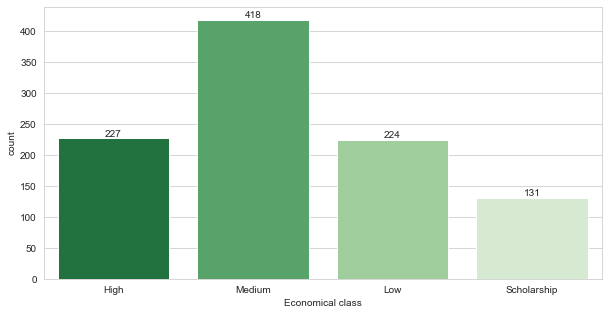

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Economical class', data=df, order=['High', 'Medium','Low','Scholarship'], 
              orient = 'h', saturation=.75, palette = 'Greens_r')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.0f}'.format(height), ha='center', fontsize=10)

Dos 1000 alunos, quase metade se enquadra na classe econômica média, enquanto que mais de 10% são bolsistas (lembrando que essas classes econômicas que criamos são baseadas nas premissas apresentadas anteriormente, e elas não tem relação direta com o dataset original). Seria interessante quebrar esse gráfico em função do nível de escolaridade dos pais. Então, vamos lá:

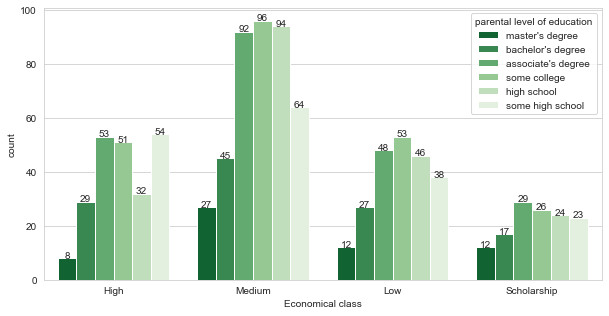

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Economical class', data=df, order=['High', 'Medium','Low','Scholarship'],
                   hue_order = ["master's degree","bachelor's degree","associate's degree",'some college',
                                'high school','some high school'],
                   orient = "h", saturation=.75, palette = 'Greens_r', hue = 'parental level of education')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, '{:.0f}'.format(height), ha='center', fontsize=10)

Podemos, por fim, constatar que não existe uma relação direta entre a classe econômica e o nível de escolaridade dos pais dos alunos. Para que essa relação exista, deveríamos ver a classe High com a maior quantidade de pais com mestrado e a classe Low com a menor quantidade. Porém sabemos que apenas escolaridade não é sinônimo de riqueza, então faz sentido, com os dados que temos, não existir essa relação direta entre escolaridade dos pais e classe econômica do filho. Até porque não temos dados que mostram a idade dos filhos, logo não sabemos se são crianças ou adultos.

# Resumindo a análise

● Vimos que as meninas/mulheres são a maioria dos alunos e também possuem as maiores notas em todas as matérias e, logicamente, possuem percentual de aprovação maior que os meninos/homens.

● Vimos também que o nível de escolaridade dos pais está diretamente ligado às notas dos alunos, ou seja, quanto maior o nível de escolaridade dos pais, maior a nota do filho.

● A seguir verificamos a influência de cursos preparatórios na nota de cada matéria e novamente constatamos que os cursos ajudaram os alunos a atingir notas maiores (lembrando que não temos detalhes de que tipo de curso é esse, sua duração ou frequência).

● Depois comparamos as notas dos grupos étnicos, e vimos que o grupo A possuem as menores notas, tanto para os meninos quanto para as meninas, e o grupo E possui as maiores notas para os meninos e meninas.

● Por fim, criamos critérios para compor nossa classificação econômica de cada aluno e com ela podemos concluir que a maior parte dos alunos pertence a classe média criada e que o nível de escolaridade dos pais não tem relação direta com a classe econômica correspondente do filho.

# FIM

Muito obrigado por chegar até aqui. Saiba que esse é o primeiro trabalho de muitos, e por ser o primeiro, podem existir muitas imprecisões e erros no código ou na análise. Sinta-se à vontade para deixar sua dica ou crítica. Obrigado novamente e até a próxima!